# 이상치 스코어 계산
1. 원본 데이터와 오토인코더로 재구성된 데이터 간의 차이를 계산
- 각 특성별 차이를 제곱하여 합산 (MSE)
- loss = Σ(original - reconstructed)²

2. Min-Max 정규화를 통해 스코어를 0~1 사이 값으로 변환
- score = (loss - min(loss)) / (max(loss) - min(loss))
- 값이 1에 가까울수록 이상치일 가능성이 높음
- 값이 0에 가까울수록 정상 데이터일 가능성이 높음


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'    #사용 방법1
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인
mpl.rcParams['axes.unicode_minus'] = False

['Malgun Gothic'] 10.0


In [1]:
import numpy as np
import pandas as pd

def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

# 예제 데이터 불러오기 

원본 데이터 shape: (150, 4)

이상치 스코어 상위 5개:
52     1.000000
65     0.739222
55     0.708835
119    0.663182
18     0.592072
dtype: float64


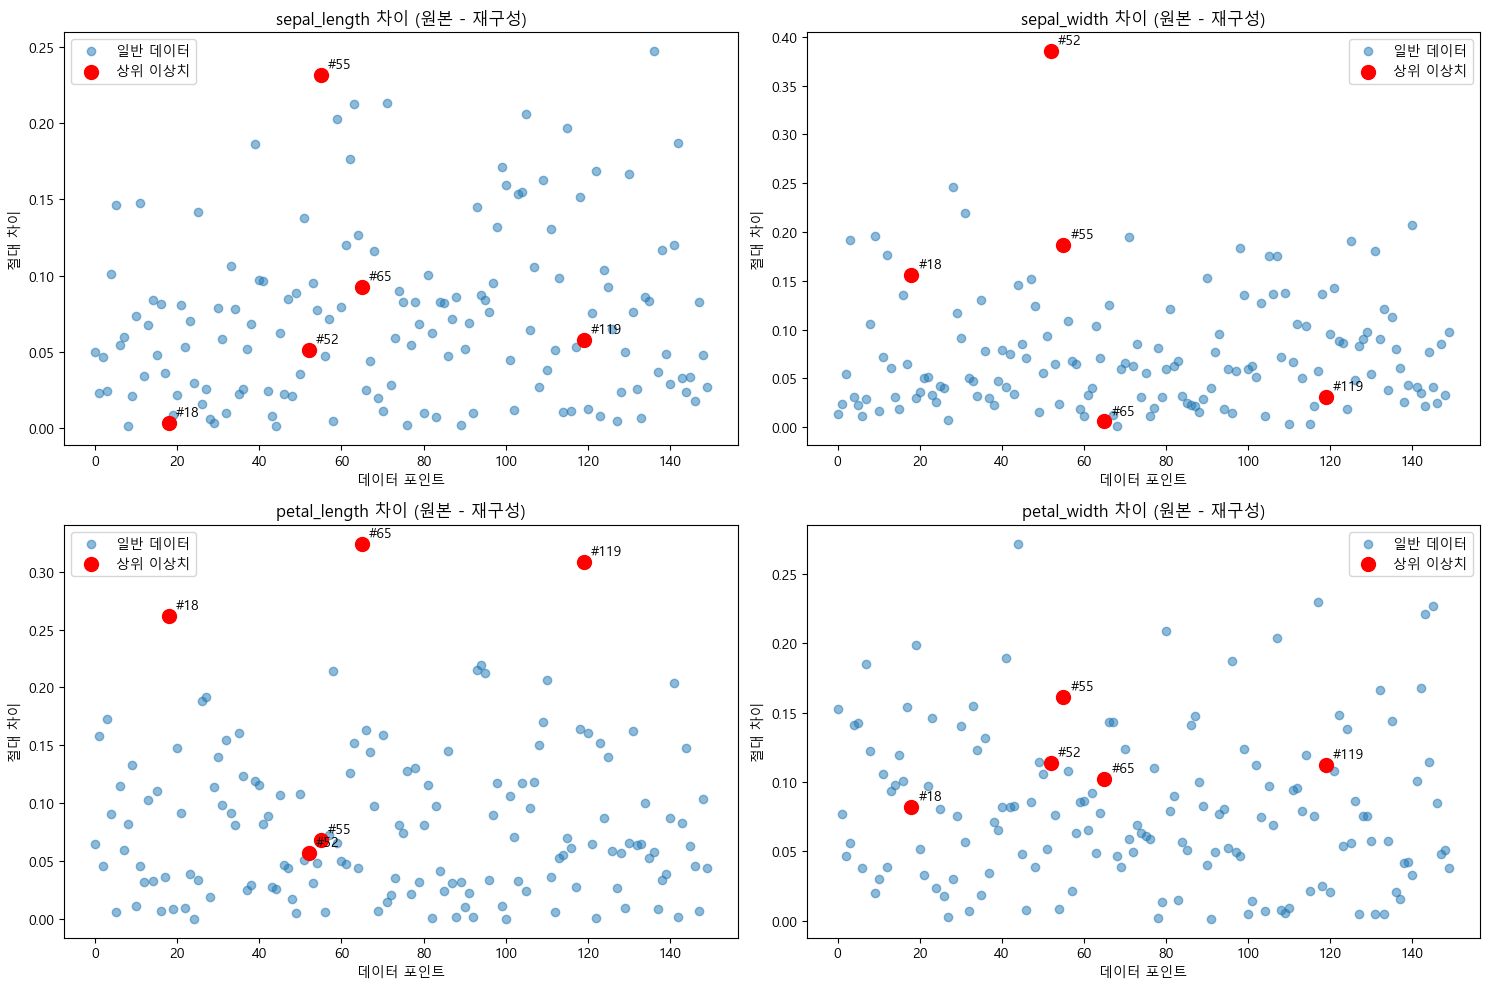


상위 5개 이상치 데이터 상세 분석:

데이터 포인트 #52:
               원본       재구성        차이
sepal_length  6.9  6.951505  0.051505
sepal_width   3.1  3.485273  0.385273
petal_length  4.9  4.957089  0.057089
petal_width   1.5  1.613557  0.113557

데이터 포인트 #65:
               원본       재구성        차이
sepal_length  6.7  6.607307  0.092693
sepal_width   3.1  3.094047  0.005953
petal_length  4.4  4.075873  0.324127
petal_width   1.4  1.297561  0.102439

데이터 포인트 #55:
               원본       재구성        차이
sepal_length  5.7  5.931466  0.231466
sepal_width   2.8  2.613273  0.186727
petal_length  4.5  4.568626  0.068626
petal_width   1.3  1.138728  0.161272

데이터 포인트 #119:
               원본       재구성        차이
sepal_length  6.0  6.057656  0.057656
sepal_width   2.2  2.231125  0.031125
petal_length  5.0  5.307888  0.307888
petal_width   1.5  1.611957  0.111957

데이터 포인트 #18:
               원본       재구성        차이
sepal_length  5.7  5.696417  0.003583
sepal_width   3.8  3.956464  0.156464
petal_length  1.7  1.438025  0.26

In [9]:
# seaborn의 iris 데이터셋을 예제로 사용
import seaborn as sns
import matplotlib.pyplot as plt

# iris 데이터 로드
iris = sns.load_dataset('iris')

# 수치형 특성만 선택 (species 제외)
original_data = iris.drop('species', axis=1)

# 데이터 복사본 생성하여 약간의 노이즈 추가 (재구성된 데이터 시뮬레이션)
np.random.seed(42)
reconstructed_data = original_data + np.random.normal(0, 0.1, original_data.shape)

# anomalyScores 함수 적용
scores = anomalyScores(original_data, reconstructed_data)

print("원본 데이터 shape:", original_data.shape)
print("\n이상치 스코어 상위 5개:")
print(scores.sort_values(ascending=False).head())

# 상위 5개 이상치 데이터 포인트의 인덱스 가져오기
top5_indices = scores.sort_values(ascending=False).head().index

# 그래프 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 각 특성별로 원본값과 재구성값의 차이를 시각화
for idx, (feature, ax) in enumerate(zip(original_data.columns, axes.ravel())):
    # 모든 데이터 포인트의 차이
    diff = abs(original_data[feature] - reconstructed_data[feature])
    ax.scatter(range(len(diff)), diff, alpha=0.5, label='Other points')
    
    # 상위 5개 이상치 데이터 포인트 강조
    for i, idx in enumerate(top5_indices):
        ax.scatter(idx, diff[idx], color='red', s=100)
        ax.annotate(f'#{idx}', (idx, diff[idx]), xytext=(5, 5), textcoords='offset points')
    
    ax.set_title(f'{feature} 차이 (원본 - 재구성)')
    ax.set_xlabel('데이터 포인트')
    ax.set_ylabel('절대 차이')
    ax.legend(['일반 데이터', '상위 이상치'])

plt.tight_layout()
plt.show()

# 상위 5개 이상치 데이터의 원본값과 재구성값 비교
print("\n상위 5개 이상치 데이터 상세 분석:")
for idx in top5_indices:
    comparison = pd.DataFrame({
        '원본': original_data.iloc[idx],
        '재구성': reconstructed_data.iloc[idx],
        '차이': abs(original_data.iloc[idx] - reconstructed_data.iloc[idx])
    })
    print(f"\n데이터 포인트 #{idx}:")
    print(comparison)
